In [29]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pickle

# Resampling
from collections import Counter
from imblearn.over_sampling import SMOTE

In [30]:
pd.set_option('display.max_columns', 31)

In [31]:
# Load data
df = pd.read_csv('Final_NHANES_2013_2014.csv', dtype = object)
df.head()

,Gender,Age,Poverty,Weight,Height,BMI,Pulse,BPSysAve,BPDiaAve,DirectChol,TotChol,FatFoods,UrineVol1,UrineFlow1,Diabetes,HealthGen,SleepHrsNight,SleepTrouble,PhysActive,WalkBic,VigActiv,ModActiv,TVHrsDay,AlcoholDay,AlcoholYear,Smoke100,mortstat
0,1,69.0,0.84,78.3,171.3,26.7,86.0,122.0,72.0,1.68,4.32,8.0,87.0,0.821,1,Vgood,7.0,Yes,0,0,0,0,2.0,1.0,1.0,1,1
1,1,54.0,1.78,89.5,176.8,28.6,74.0,156.0,62.0,1.29,4.4,0.0,90.0,1.636,1,Fair,9.0,No,1,0,0,0,4.0,4.0,7.0,1,1
2,1,72.0,4.51,88.9,175.3,28.9,68.0,140.0,90.0,1.55,3.26,1.0,66.0,0.684,1,Good,8.0,No,1,0,0,1,4.0,2.0,0.0,1,1
3,0,73.0,5.0,52.0,162.4,19.7,92.0,136.0,86.0,2.2,5.2,0.0,5.0,0.109,0,Poor,9.0,No,1,0,0,0,1.0,2.0,0.0,0,0
4,1,56.0,4.79,105.0,158.7,41.7,60.0,160.0,84.0,0.98,5.84,14.0,197.0,1.187,0,Poor,5.0,No,0,0,0,0,5.0,1.0,5.0,1,1


In [32]:
cols = ['Weight', 'BMI', 'Pulse', 'TotChol', 'Diabetes', 'SleepHrsNight', 'Age', 'Smoke100', 'PhysActive', 'WalkBic', 'VigActiv', 'ModActiv', 'TVHrsDay', 'FatFoods', 'AlcoholDay', 'AlcoholYear', 'mortstat']
df = df[cols]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.head()

,Weight,BMI,Pulse,TotChol,Diabetes,SleepHrsNight,Age,Smoke100,PhysActive,WalkBic,VigActiv,ModActiv,TVHrsDay,FatFoods,AlcoholDay,AlcoholYear,mortstat
0,78.3,26.7,86.0,4.32,1,7.0,69.0,1,0,0,0,0,2.0,8.0,1.0,1.0,1
1,89.5,28.6,74.0,4.40,1,9.0,54.0,1,1,0,0,0,4.0,0.0,4.0,7.0,1
2,88.9,28.9,68.0,3.26,1,8.0,72.0,1,1,0,0,1,4.0,1.0,2.0,0.0,1
3,52.0,19.7,92.0,5.20,0,9.0,73.0,0,1,0,0,0,1.0,0.0,2.0,0.0,0
4,105.0,41.7,60.0,5.84,0,5.0,56.0,1,0,0,0,0,5.0,14.0,1.0,5.0,1


In [33]:
X = df.drop(columns=['mortstat'])
y= df['mortstat']

In [34]:
sm = SMOTE(random_state=42)

In [35]:
X_res, y_res = sm.fit_resample(X, y)

In [36]:
df = X_res

In [37]:
df = pd.concat([df, y_res], axis=1)

In [38]:
df = df[df['mortstat'] == 0]

In [39]:
df.drop(columns = ['mortstat'], inplace = True)

In [40]:
df.head()

,Weight,BMI,Pulse,TotChol,Diabetes,SleepHrsNight,Age,Smoke100,PhysActive,WalkBic,VigActiv,ModActiv,TVHrsDay,FatFoods,AlcoholDay,AlcoholYear
3,52.0,19.7,92.0,5.20,0,9.0,73.0,0,1,0,0,0,1.0,0.0,2.0,0.0
28,111.9,38.9,60.0,4.16,0,6.0,75.0,1,1,0,0,0,4.0,3.0,2.0,0.0
95,71.2,25.9,84.0,4.55,1,6.0,69.0,1,0,0,0,0,4.0,2.0,1.0,5.0
108,56.4,25.1,68.0,5.15,0,9.0,80.0,0,0,0,0,0,5.0,10.0,2.0,2.0
151,180.1,64.7,98.0,3.05,1,7.0,57.0,1,0,0,0,0,5.0,5.0,2.0,0.0


In [41]:
X = df.drop(columns=['Age'])
y = df['Age']

In [42]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/home/dell/anaconda2/envs/tfdeeplearning/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/dell/anaconda2/envs/tfdeeplearning/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [44]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [45]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[17:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [46]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 25.631658


In [47]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[17:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [48]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,62.102919,0.090844,62.108448,0.216349
1,56.134964,0.041587,56.158576,0.240786
2,50.713693,0.038736,50.752516,0.214297
3,45.881313,0.039734,45.924126,0.209409
4,41.532125,0.037889,41.593494,0.216178


In [49]:
print((cv_results["test-rmse-mean"]).tail(1))

49    6.331183
Name: test-rmse-mean, dtype: float64


NameError: name 'plt' is not defined

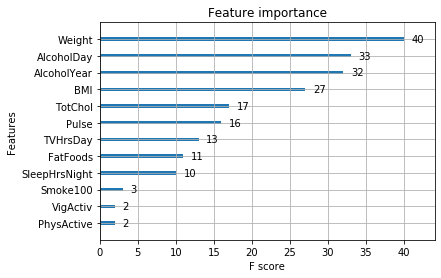

In [50]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
# save the model to disk
filename = 'Age_model.sav'
pickle.dump(xg_reg, open(filename, 'wb'))